# **Analisis Predictivo de la Edad del Cangrejo 🦀**

## Descripción del Prob

Para un criador comercial de cangrejos, conocer la edad correcta del cangrejo les ayuda a decidir si cosechar los cangrejos y cuándo. Más allá de cierta edad, hay un crecimiento insignificante en las características físicas del cangrejo y, por lo tanto, es importante cronometrar la cosecha para reducir el costo y aumentar las ganancias.

## Fuente del Dataset
Estos Datos fueron extraidos de la plataforma kaggle [Dataset](https://www.kaggle.com/code/umutcindiloglu/crab-age-prediction).



# **Importamos Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

# **Carga de Datos**

In [2]:
!kaggle datasets download -d sidhus/crab-age-prediction -p "D:\DataSets\CrabAge"

Dataset URL: https://www.kaggle.com/datasets/sidhus/crab-age-prediction
License(s): CC0-1.0
crab-age-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


## Vamos a descomprimir el archivo .zip, para eso vamos a utilizar python

In [3]:
import zipfile

#Ruta del archivo zip
zip_file_path = "D:/DataSets/CrabAge/crab-age-prediction.zip"

#Carpeta de destino
destination_path = "D:/DataSets/CrabAge"

#Extraer el archivo
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(destination_path)

print("Archivo descomprimido correctamente.")

Archivo descomprimido correctamente.


## Cargamos el archivo .csv

In [4]:
import os

raw_path = "D:/DataSets/CrabAge"

csv_path = os.path.join(raw_path, "CrabAgePrediction.csv")

#Verificar si el archivo existe antes de cargarlo
if os.path.exists(csv_path):
    #Cargar el archivo CSV en un dataframe
    data = pd.read_csv(csv_path)
    print("Dataframe cargado con éxito:")
    print(data.head())  # Mostrar las primeras filas del Dataframe
else:
    print(f"El archivo {csv_path} no fue encontrado.")


Dataframe cargado con éxito:
  Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   F  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1   M  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2   I  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3   F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4   I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244657   10  
4      1.700970    6  


## Veamos los datos en la tabla

In [5]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


# **Análisis Exploratorio**

**Descripción General**

        • ¿Qué variables están presentes?
        • ¿Cuántos registros hay en el dataset?
        • ¿Qué tipos de datos tienen las variables? (numéricos, categóricos, fechas, texto, etc.)

**Contexto del dominio**

        • ¿Qué significan las variables y cómo se relacionan con el objetivo del análisis?

## Descripción General

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


Las variables presentes en el Dataset son:
    
        • Sex (Sexo)
        • length (largo)
        • Diameter (Diametro)
        • Height (Altura)
        • Weight (Peso)
        • Shucked Weight (Peso Descascarado)
        • Viscera Weight (Peso de las Visceras)
        • Shell Weight (Peso de la Concha)
        • Age (Edad)


Cantidad de Registros y Tipos de Variables:

> Tenemos `3893` registros, en cada una de las `9` variables obtenidas.

> Todas las variables son tipo númerico en particular `Float`, excepto Sex que es de tipo `categórico`.

> En particular, la variable númerica `Age` es discreta, excepto las otras variables númericas que son continuas.

## Contexto del dominio

**Objetivos**:
    
+ El primer objetivo es identificar cuáles de las variables disponibles (sexo, longitud, diámetro, altura, peso total, peso sin cáscara, peso de las vísceras y peso de la cáscara) tienen una correlación más fuerte con la edad del cangrejo.

    > Al identificar las variables más influyentes en la determinación de la edad, podemos enfocarnos en medir y registrar estas variables de manera más precisa y eficiente, reduciendo costos operativos.
    
+ El segundo objetivo es desarrollar un modelo de machine learning que permita predecir la edad de un cangrejo en función de sus características físicas.

    > Un modelo preciso permitirá a los criadores tomar decisiones más informadas sobre cuándo cosechar los cangrejos, maximizando así sus ganancias.

**Descripción de las Variables o Características:**

> - Age (Edad): Edad del cangrejo (en meses)

> - Sex (Sexo): Sexo del cangrejo; Femenino (F), masculino (M) o indeterminado (I).

> - length (largo): Largo del cangrejo (en pies; 1 pie = 30.48 cm).

> - Diameter (Diametro): Diametro del cangrejo (en pies; 1 pie = 30.48 cm).

> - Height (Altura): Altura del cangrejo (en pies; 1 pie = 30.48 cm).

> - Weight (Peso): Peso del cangrejo (en onzas; 1 libra = 16 onzas).

> - Shucked Weight (Peso Descascarado): Peso del cangrejo sin cascarón (en onzas; 1 libra = 16 onzas).

> - Viscera Weight (Peso de las Visceras): Peso de las visceras del cangrejo (en onzas; 1 libra = 16 onzas).

> - Shell Weight (Peso de la Concha): Peso del cascarón del cangrejo (en onzas; 1 libra = 16 onzas).

La varible objetivo o a predecir es `Age`


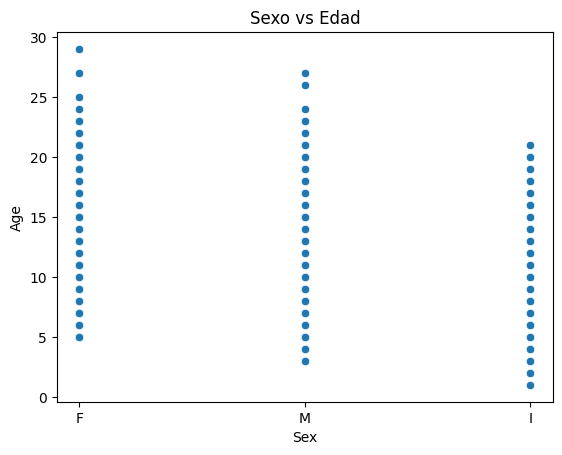

In [19]:
sns.scatterplot(x='Sex', y='Age', data=data)
plt.title("Sexo vs Edad")
plt.show()

> Notemos que los cangrejos de sexo femenino inician aproximadamente despues de los cinco meses.

> Entre cangrejos de sexo `masculino` y `femenino` comparten casi las mismas edades.

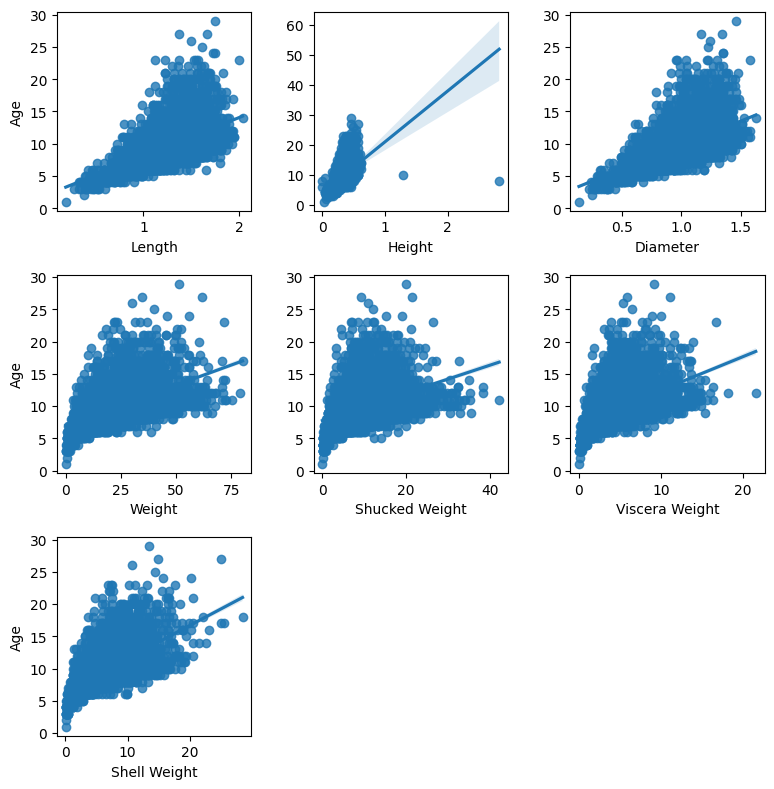

In [16]:
fig, axis = plt.subplots(3, 3, figsize = (8, 8))

#Crear un diagrama de dispersión multiple
sns.regplot(ax = axis[0,0], data = data, x = "Length", y = "Age")
sns.regplot(ax = axis[0,1], data = data, x = "Height", y = "Age").set(ylabel = None)
sns.regplot(ax = axis[0,2], data = data , x = "Diameter", y = "Age").set(ylabel = None)
sns.regplot(ax = axis[1,0], data = data, x = "Weight", y = "Age")
sns.regplot(ax = axis[1,1], data = data, x = "Shucked Weight", y = "Age").set(ylabel = None)
sns.regplot(ax = axis[1,2], data = data, x = "Viscera Weight", y = "Age").set(ylabel = None)
sns.regplot(ax = axis[2,0], data = data, x = "Shell Weight", y = "Age")

#Ajustar el layout
plt.tight_layout()
plt.delaxes(axis[2,1])
plt.delaxes(axis[2,2])

#Mostrar el plot
plt.show()

> Observemos que la correspondencia entre las variables númericas de los cangrejos respecto a la variable objetivo (Age) es `lineal`.

> Esto es, que a medida que la variable del X aumenta, la variable del eje Y (Age) también aumenta, no necesariamente con todas las variables.

> A excepción de la variable `height`, ya que no aumenta tanto en el eje X pero si en el eje Y.

### Detallemos más de cerca que esta pasando con Weight respecto a Age

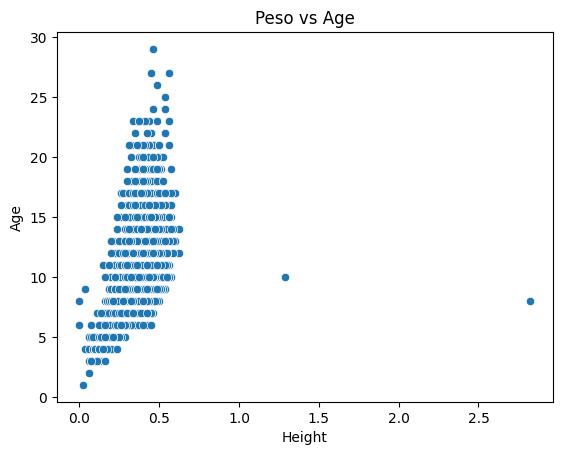

In [21]:
sns.scatterplot(x='Height', y='Age', data=data)
plt.title("Peso vs Age")
plt.show()

> No necesariamente entre más altura tenga el cangrejo mayor va a ser su edad.

# **Limpieza de datos**

**Valores faltantes:**

        • ¿Qué proporción de datos falta en cada variable?
        • ¿Estos valores faltantes tienen un patrón (aleatorio o no)?
        • ¿Cómo se pueden manejar (eliminación, imputación)?

**Errores o inconsistencias:**

        • ¿Existen valores que no tengan sentido o estén fuera de rango?
        • Por ejemplo, edades negativas o fechas imposibles.

**Duplicados:**

        • ¿Hay registros repetidos que deben eliminarse?

# Valores Faltantes

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


> Note que el dataset no tiene `valores faltantes`, cada columna tiene `3893` registros completos.

# Errores o Inscosistencias

> Veamos que en las columnas de tipo númericas no tengamos valores negativos, ya que no tendrian sentido para nuestra predección.

In [52]:
# Verificar que no tengamos valores negativos por cada variable de la columna

data_copy = data.drop(columns=["Sex"])

for column in data_copy.columns:
    print(f"Valores negativos encontrados en la variable {column}:")
    print(data[data[column] < 0])


Valores negativos encontrados en la variable Length:
Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight, Age]
Index: []
Valores negativos encontrados en la variable Diameter:
Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight, Age]
Index: []
Valores negativos encontrados en la variable Height:
Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight, Age]
Index: []
Valores negativos encontrados en la variable Weight:
Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight, Age]
Index: []
Valores negativos encontrados en la variable Shucked Weight:
Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight, Age]
Index: []
Valores negativos encontrados en la variable Viscera Weight:
Empty DataFrame
Columns: [Sex, Len

> No tenemos valores negativos en nuestras variables

# Duplicados

In [54]:
sum_duplicados = data.duplicated().sum()
print(sum_duplicados)

0


> No tenemos registros `duplicados`

In [55]:
sum_nan = data.isnull().sum()
print(sum_nan)

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


> No tenemos registros `nulos`

In [ ]:
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


!que vemos!🤔 

In [ ]:
data.describe(include = object)
sns.heatmap(data.corr(), annot = True )

,Sex
count,3893
unique,3
top,M
freq,1435


Notemos que hay más cangrejos de sexo masculino

<Axes: >

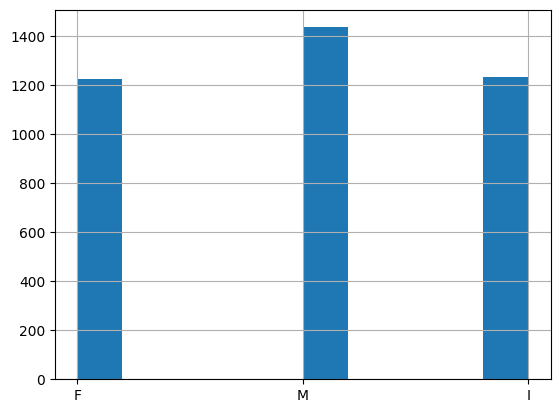

In [26]:
# Mostrar los valores de la caracteristica con un histograma
%matplotlib inline
data["Sex"].hist()

<function matplotlib.pyplot.show(close=None, block=None)>

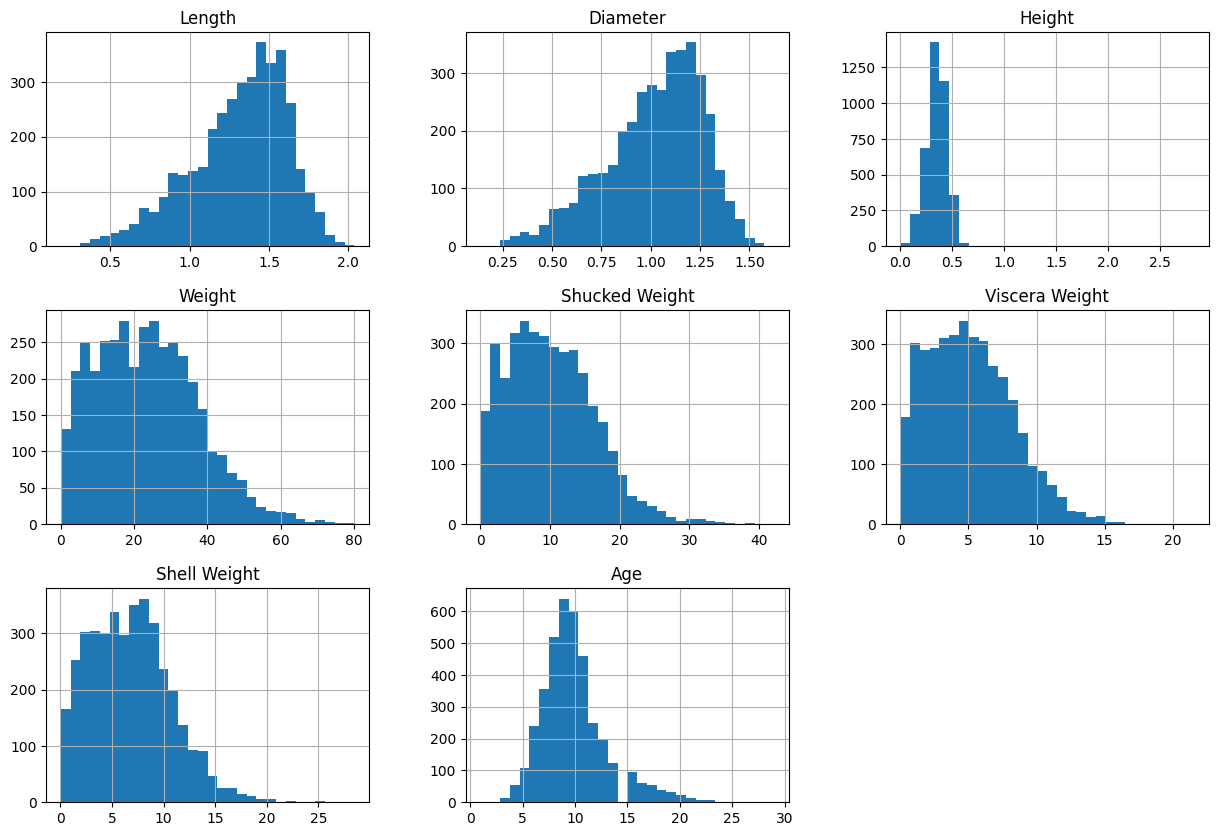

In [27]:
data.hist(bins = 30 ,  figsize=(15, 10))
plt.show

## Vamos a analizar la correlación entre los atributos

#Primero: Transformamos los valores del atributo sex de categoricos a númericos

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
labelencoder = LabelEncoder()
data["Sex"] = labelencoder.fit_transform(data["Sex"])
data

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,2,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,1,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,0,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,1,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,0,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,0,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,1,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,1,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


#### Note que: 
 - 0 => Femenino
 - 1 => Indeterminado
 - 2 => Masculino


### Construimos la matriz de correlación

Note que las caracteristicas que tienen más correlación con Age son:
 - Shell Weight
 - Diameter
 - Length
 - Height
 - Weight


In [21]:
#Mostrar correlación lineal entre todos los atributos del conjunto de datos
data.corr()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Sex,1.000000,-0.034975,-0.038394,-0.041629,-0.021773,-0.002353,-0.032110,-0.036216,-0.033700
Length,-0.034975,1.000000,0.986653,0.823081,0.925374,0.898181,0.903253,0.897736,0.554973
Diameter,-0.038394,0.986653,1.000000,0.829532,0.925770,0.893626,0.899810,0.905561,0.573844
Height,-0.041629,0.823081,0.829532,1.000000,0.814405,0.770961,0.793272,0.812290,0.551956
Weight,-0.021773,0.925374,0.925770,0.814405,1.000000,0.969077,0.965583,0.955269,0.538819
Shucked Weight,-0.002353,0.898181,0.893626,0.770961,0.969077,1.000000,0.931280,0.882406,0.418760
Viscera Weight,-0.032110,0.903253,0.899810,0.793272,0.965583,0.931280,1.000000,0.906105,0.501328
Shell Weight,-0.036216,0.897736,0.905561,0.812290,0.955269,0.882406,0.906105,1.000000,0.625195
Age,-0.033700,0.554973,0.573844,0.551956,0.538819,0.418760,0.501328,0.625195,1.000000


<AxesSubplot:>

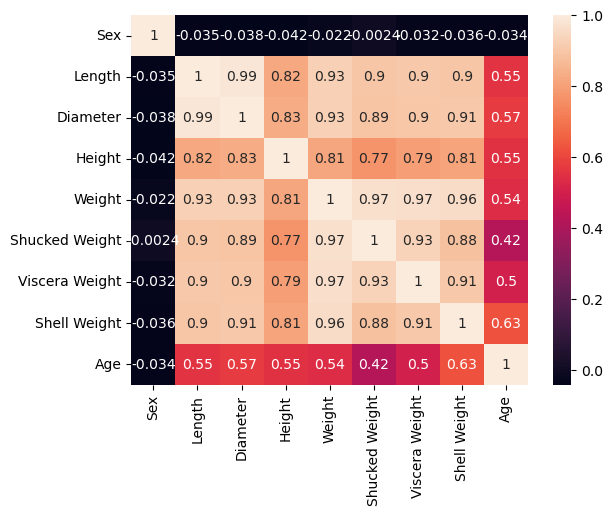

### Vamos a comparar Age con la distintas caracteristicas presentes en el dataset

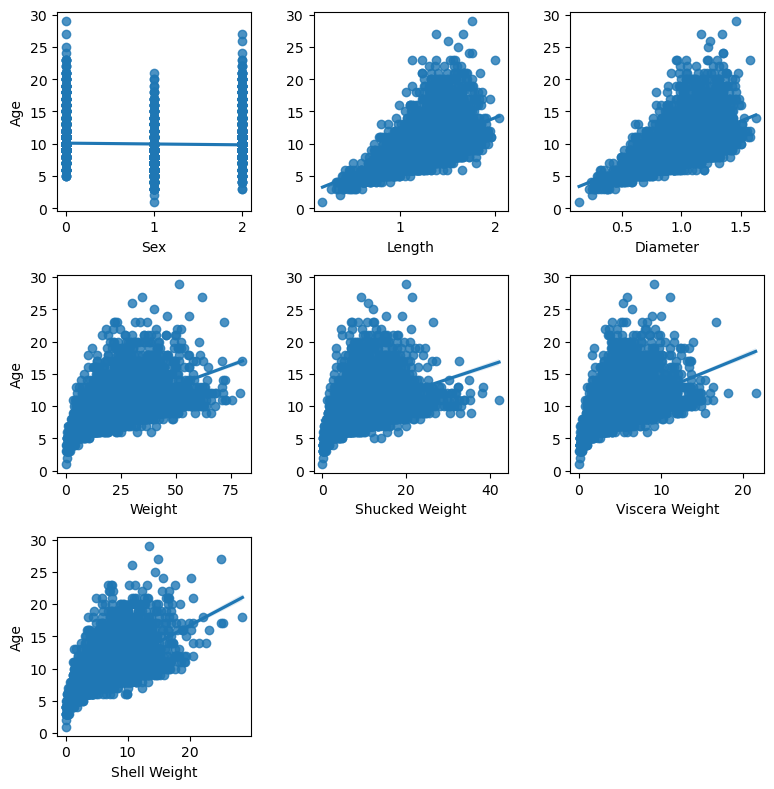

In [35]:
fig, axis = plt.subplots(3, 3, figsize = (8, 8))

#Crear un diagrama de dispersión multiple
sns.regplot(ax = axis[0,0], data = data, x = "Sex", y = "Age")
sns.regplot(ax = axis[0,1], data = data, x = "Length", y = "Age").set(ylabel = None)
sns.regplot(ax = axis[0,2], data = data , x = "Diameter", y = "Age").set(ylabel = None)
sns.regplot(ax = axis[1,0], data = data, x = "Weight", y = "Age")
sns.regplot(ax = axis[1,1], data = data, x = "Shucked Weight", y = "Age").set(ylabel = None)
sns.regplot(ax = axis[1,2], data = data, x = "Viscera Weight", y = "Age").set(ylabel = None)
sns.regplot(ax = axis[2,0], data = data, x = "Shell Weight", y = "Age")

#Ajustar el layout
plt.tight_layout()
plt.delaxes(axis[2,1])
plt.delaxes(axis[2,2])

#Mostrar el plot
plt.show()

# Preparacion de Datos

# Modelado

# Validación

# Despliegue